In [1]:
import numpy as np

# 生成 2 组 x 相同的示例数据
x = np.array([4, 8, 12, 25, 32, 43, 58, 63, 69, 79]).reshape(-1, 1)
y1 = np.array([9, 17, 23, 51, 62, 83, 115, 125, 137, 159]).reshape(-1, 1)
y2 = np.array([20, 33, 50, 56, 42, 31, 33, 46, 65, 75]).reshape(-1, 1)

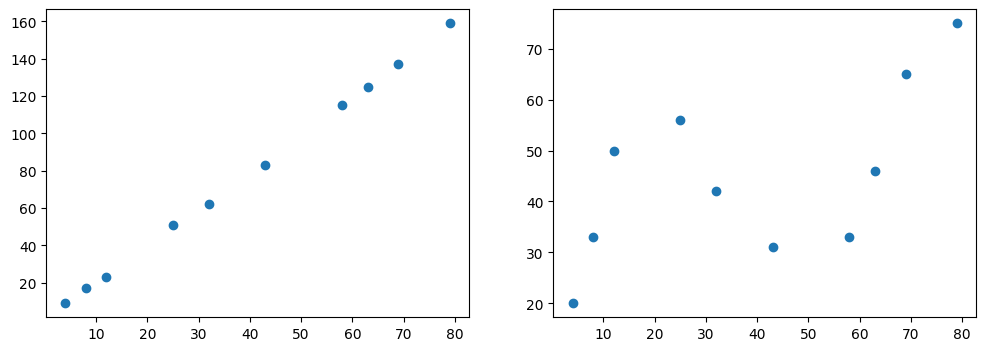

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

# 两组数据分别绘制子图
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(x, y1)
axes[1].scatter(x, y2)

In [3]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()  # 线性模型 1
model1.fit(x, y1)

model2 = LinearRegression()  # 线性模型 2
model2.fit(x, y2)

LinearRegression()

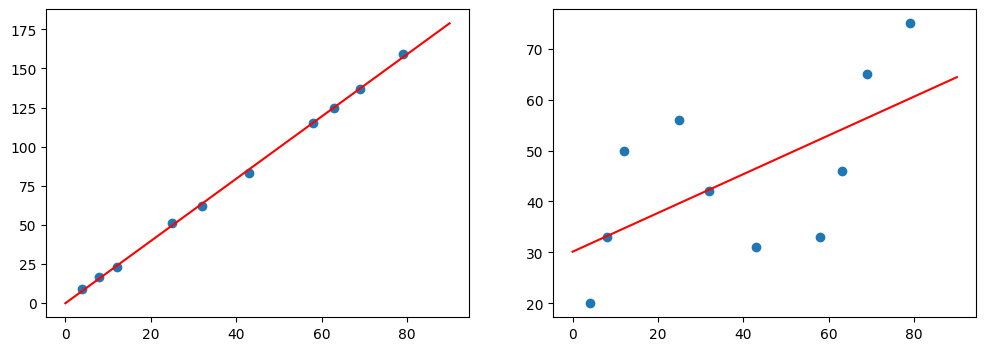

In [4]:
# 绘制拟合直线到原散点图中
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 模型 1
axes[0].scatter(x, y1)
axes[0].plot(
    [0, 90], [model1.intercept_, model1.coef_[0] * 90 + model1.intercept_], "r"
)
# 模型 2
axes[1].scatter(x, y2)
axes[1].plot(
    [0, 90], [model2.intercept_, model2.coef_[0] * 90 + model2.intercept_], "r"
)

In [5]:
from sklearn.metrics import r2_score

# 分别传入真实观测值和模型预测值
r2_score(y1, model1.predict(x)), r2_score(y2, model2.predict(x))

(0.9993315719475073, 0.3740615194558857)

In [6]:
# 使用公式计算方法验证 model1 计算结果
rss = np.sum(pow((y1 - model1.predict(x)), 2))
tss = np.sum(pow((y1 - np.mean(y1)), 2))
1 - rss / tss

0.9993315719475073

Text(0.5, 1.0, 'r2_score: -3.7404627174607548')

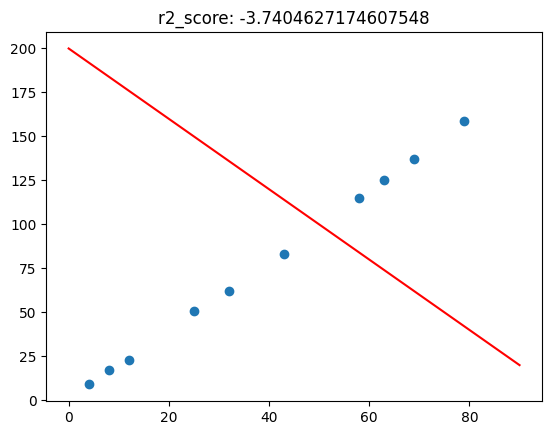

In [7]:
plt.scatter(x, y1)
plt.plot([0, 90], [200, -2 * 90 + 200], "r")  # 线性函数为：y = -2x + 200
plt.title("r2_score: {}".format(r2_score(y1, -2 * x + 200)))

In [ ]:
# scikit-learn 提供的 API 有可能计算出 R^2 值为负数的情况
# 这时候 TSS = RSS + ESS 会失效，具体 R^2 值取多少需要视情况而定，不同问题不一样